In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anemia = pd.read_csv("/kaggle/input/anemia-types-classification/diagnosed_cbc_data_v4.csv")
anemia

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


# **Descriptive Statistics**

In [3]:
# we'll take a closer look at the data

print(anemia.describe())
print(anemia.isna().sum())

               WBC         LYMp        NEUTp         LYMn        NEUTn  \
count  1281.000000  1281.000000  1281.000000  1281.000000  1281.000000   
mean      7.862717    25.845000    77.511000     1.880760     5.140940   
std       3.564466     7.038728   147.746273     1.335689     2.872294   
min       0.800000     6.200000     0.700000     0.200000     0.500000   
25%       6.000000    25.845000    71.100000     1.880760     5.100000   
50%       7.400000    25.845000    77.511000     1.880760     5.140940   
75%       8.680000    25.845000    77.511000     1.880760     5.140940   
max      45.700000    91.400000  5317.000000    41.800000    79.000000   

               RBC          HGB        HCT          MCV          MCH  \
count  1281.000000  1281.000000  1281.0000  1281.000000  1281.000000   
mean      4.708267    12.184551    46.1526    85.793919    32.084840   
std       2.817200     3.812897   104.8861    27.177663   111.170756   
min       1.360000   -10.000000     2.0000   

**Clean Data so far, let's check for the existence of duplicates**

In [4]:
print(anemia.duplicated().sum())

49


In [5]:
print(len(anemia))

anemia.drop_duplicates(inplace=True)

print(len(anemia))

1281
1232


**Nice, duplicates have been removed successfully!, Let's continue**

# **Exploratory Data Analysis**

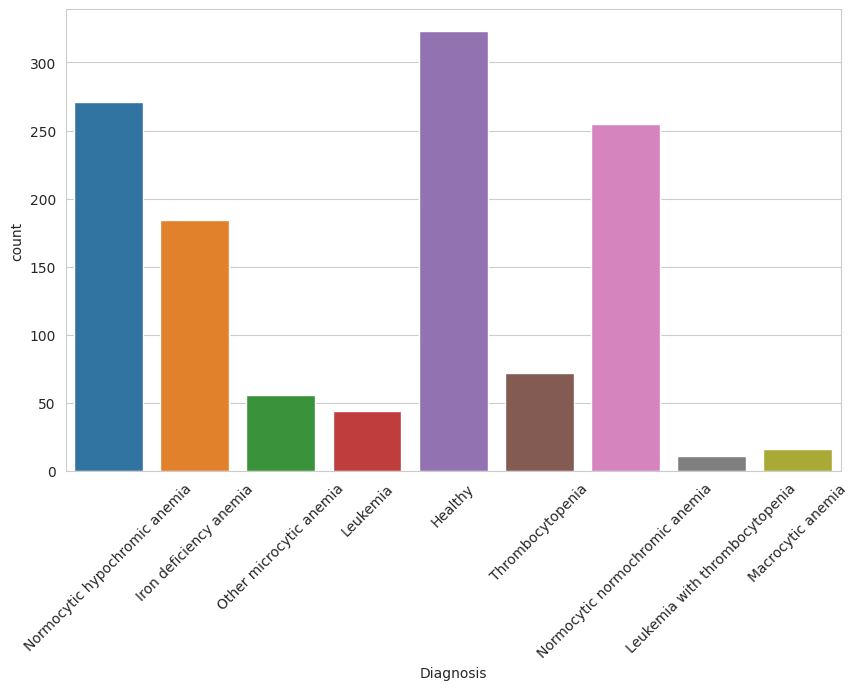

In [6]:
# set plot style
sns.set_style("whitegrid")

# increase the figure size

fig, ax = plt.subplots(figsize=(10, 6))

fig = sns.countplot(data=anemia, x="Diagnosis")

# rotate the x-tick labels by 45 degrees

plt.xticks(rotation=45)


# show the plot

plt.show()

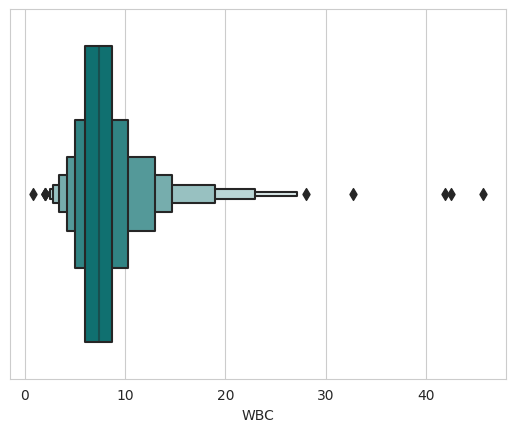

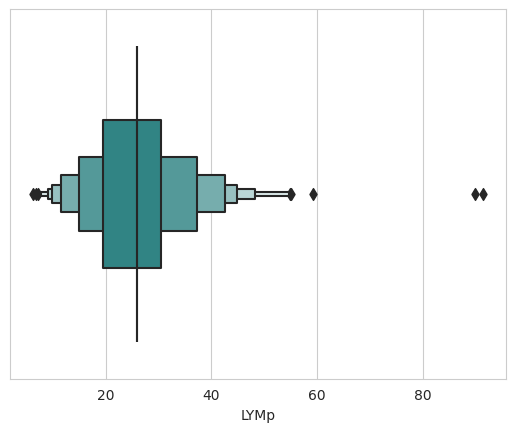

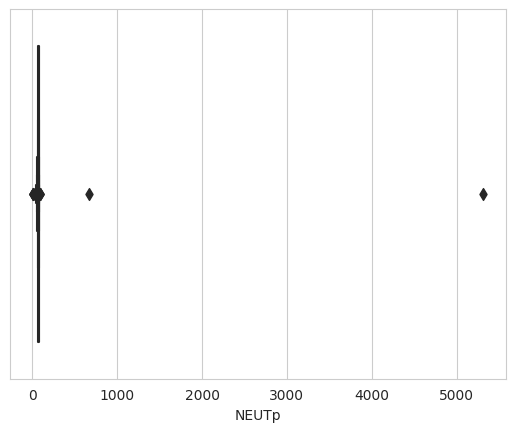

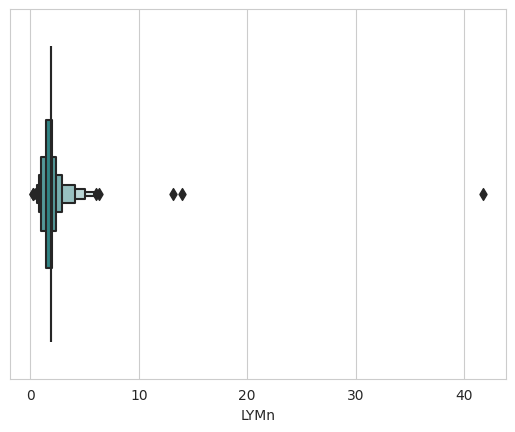

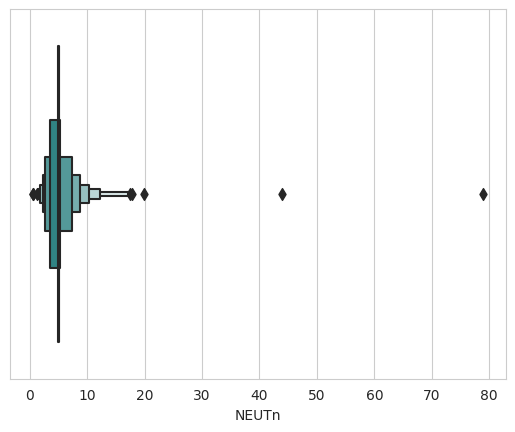

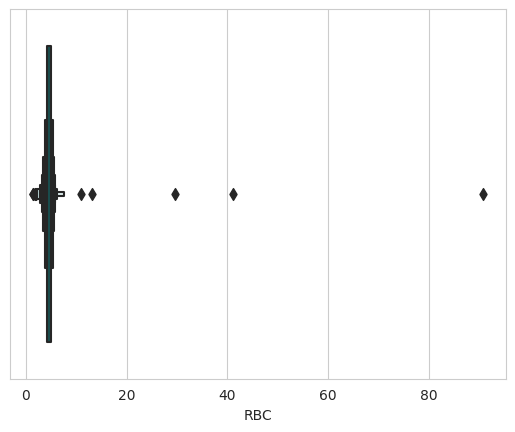

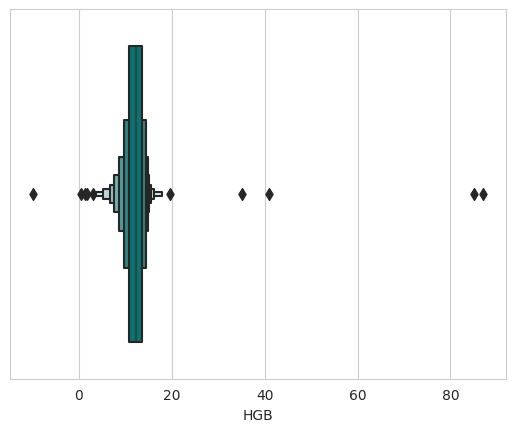

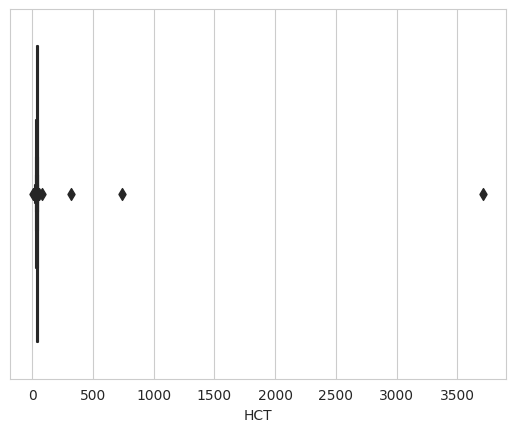

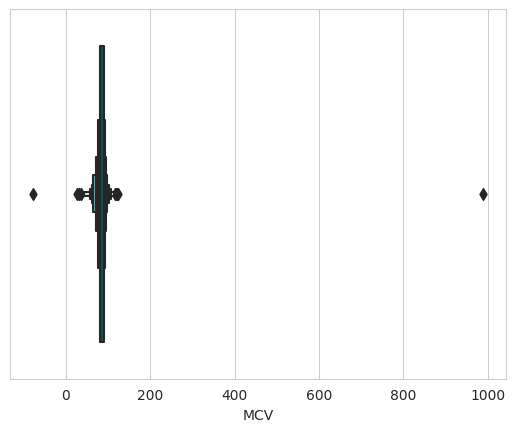

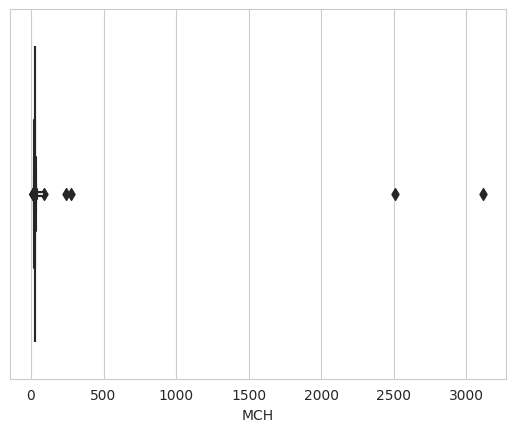

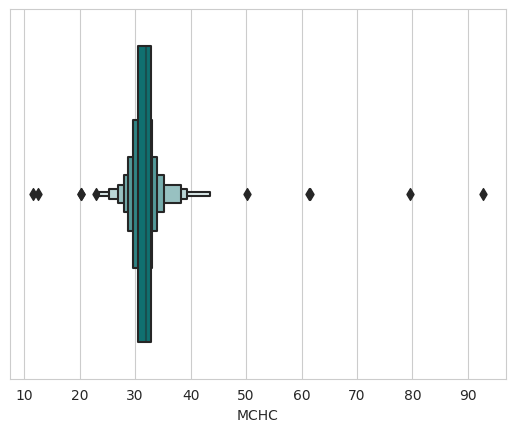

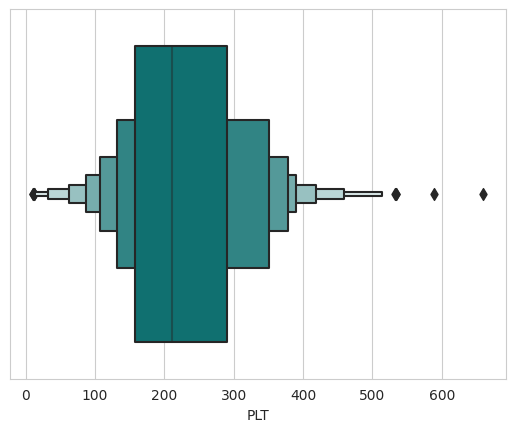

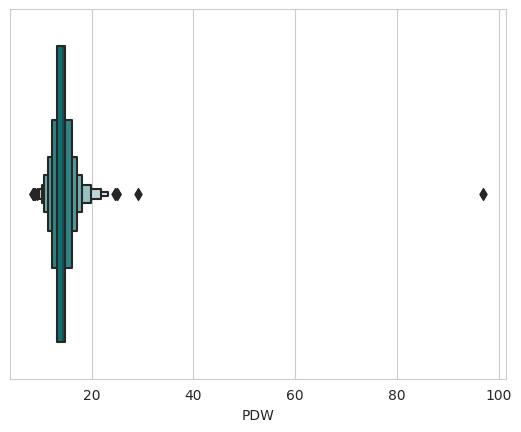

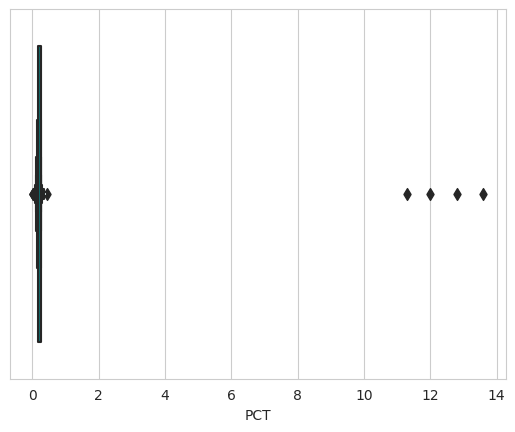

In [7]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

for i in anemia.drop("Diagnosis", axis=1).columns:
    sns.boxenplot(data=anemia, x=i, color="teal")
    plt.show()

# **I'm not a Doctor!**

**There seems to be Outliers in all columns!**

**however, since I'm not a Doctor, I'm in no place to tell whether I should drop these outliers or not**

**Maybe some of them will be crucial to the Diagnosis!, so it's best to compare the performance of the models before and after dropping!**

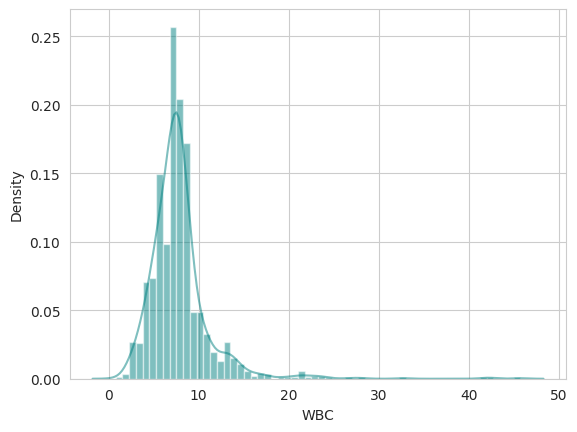

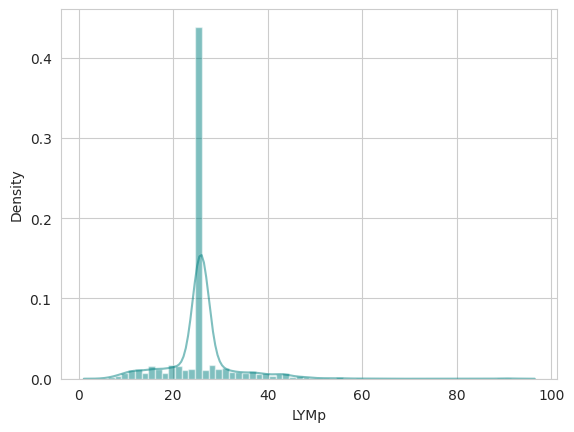

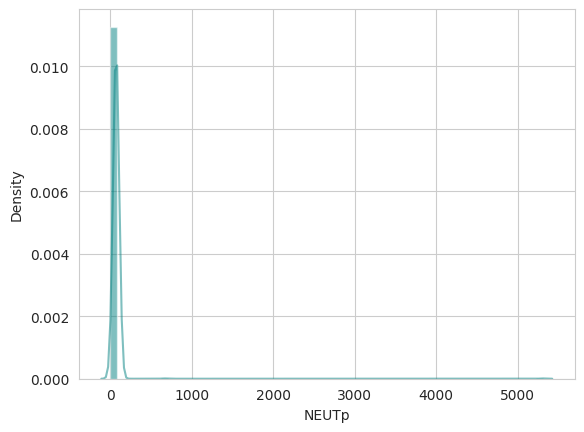

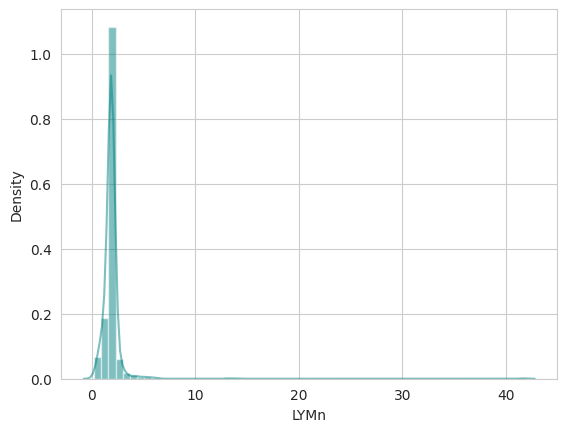

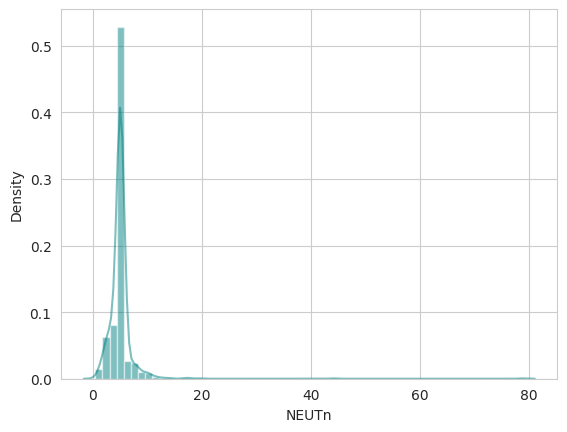

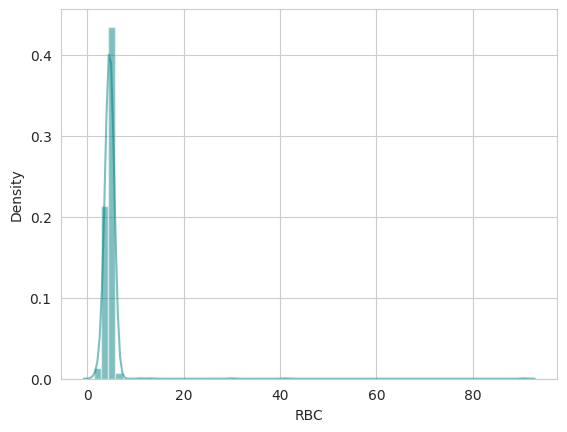

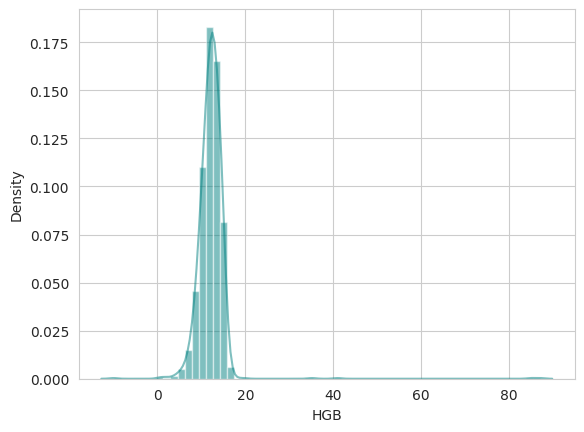

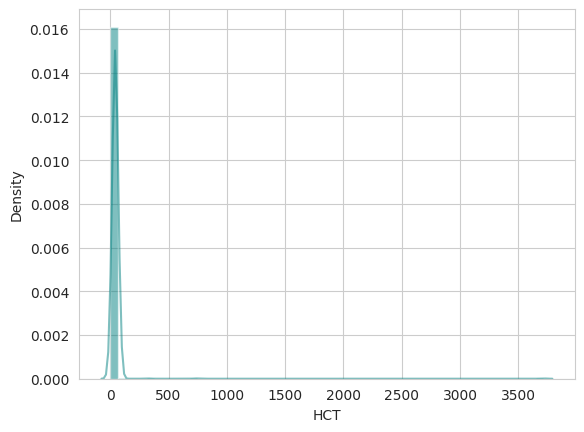

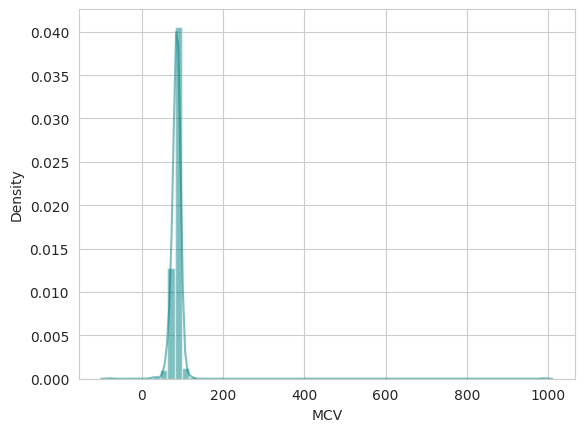

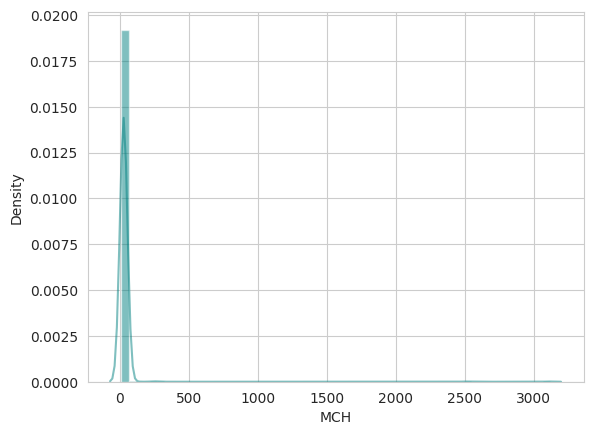

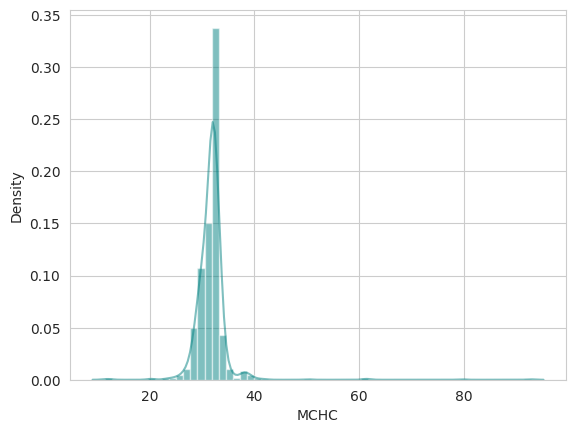

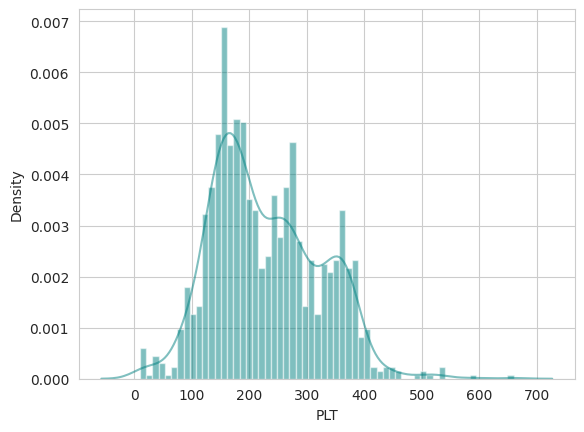

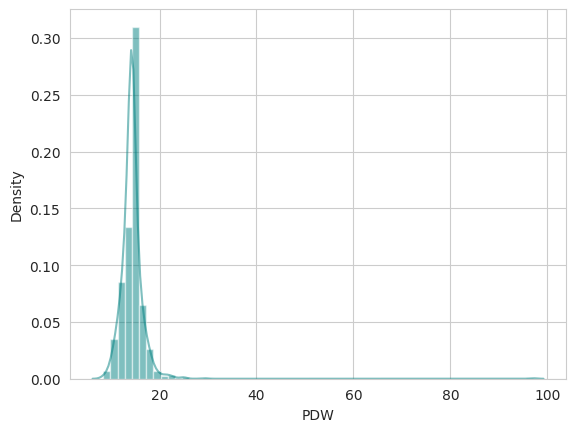

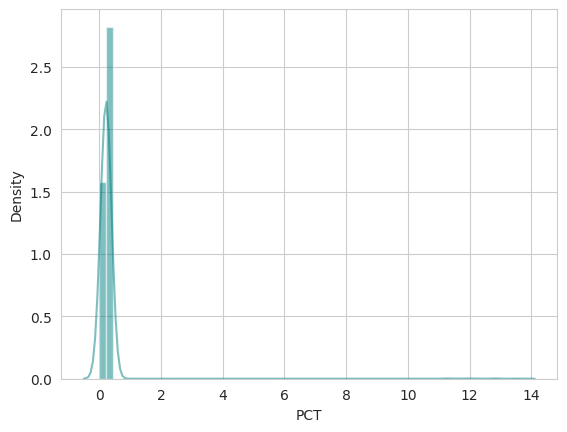

In [8]:
for i in anemia.drop("Diagnosis", axis=1).columns:
    
    kde = sns.kdeplot(data=anemia, x=i, color='teal', alpha=0.5)

    hist = plt.hist(anemia[i], bins=60, alpha=0.5, color='teal', density=True)
    
    plt.show()

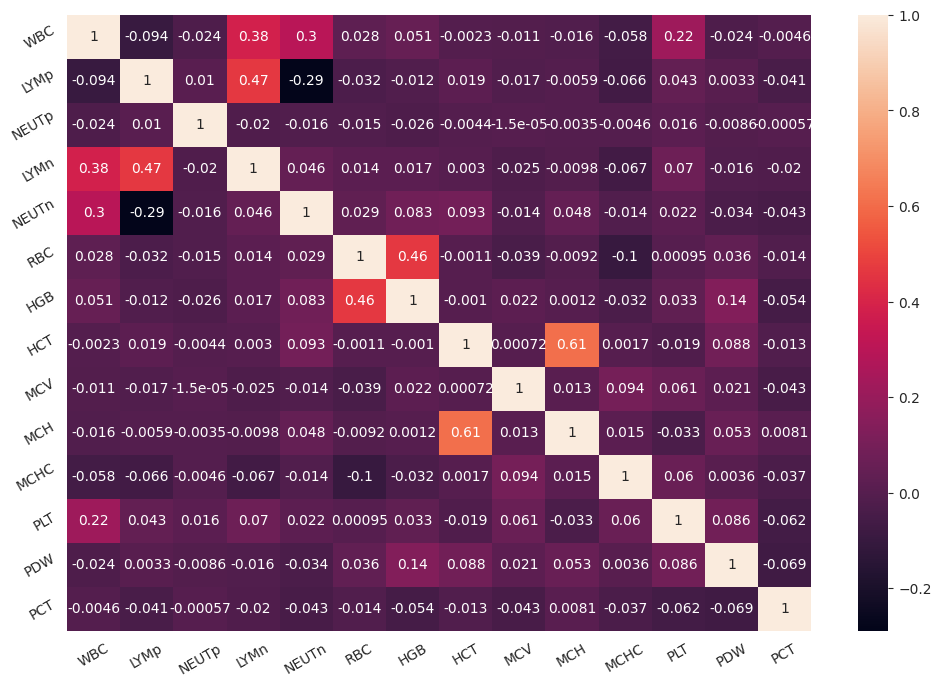

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

fig = sns.heatmap(anemia.drop("Diagnosis", axis=1).corr(), annot=True)

plt.xticks(rotation=30)

plt.yticks(rotation=30)

plt.show()

# **A Decent Correlation**

**A decent Correlation was detected between HCT and MCH columns!, maybe we should consider dropping one of them and see how that affects the performance of our models!**

In [10]:
import catboost as cb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# **CatBoost Classifier**

In [11]:
X = anemia.drop("Diagnosis", axis=1)
y = anemia["Diagnosis"]

model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1,
                              depth=6,random_state=42, verbose=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv,
                         scoring='accuracy',
                         n_jobs=-1, verbose=False)

print("Mean cross-validation score CatBoost:", scores.mean())

Mean cross-validation score CatBoost: 0.9813271452552582


**That's a very promising score so far!, let's see the score if we drop one of the correlating columns!**

In [12]:
X = anemia.drop("Diagnosis", axis=1)
y = anemia["Diagnosis"]

model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1,
                              depth=6,random_state=42, verbose=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv,
                         scoring='accuracy',
                         n_jobs=-1, verbose=False)

print("Mean cross-validation score CatBoost:", scores.mean())



# HCT dropped

X = anemia.drop(["Diagnosis", "HCT"], axis=1)
y = anemia["Diagnosis"]

model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1,
                              depth=6,random_state=42, verbose=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv,
                         scoring='accuracy',
                         n_jobs=-1, verbose=False)

print("Mean cross-validation score CatBoost HCT dropped:", scores.mean())



# MCH dropped

X = anemia.drop(["Diagnosis", "MCH"], axis=1)
y = anemia["Diagnosis"]

model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1,
                              depth=6,random_state=42, verbose=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv,
                         scoring='accuracy',
                         n_jobs=-1, verbose=False)

print("Mean cross-validation score CatBoost MCH dropped:", scores.mean())

Mean cross-validation score CatBoost: 0.9813271452552582
Mean cross-validation score CatBoost HCT dropped: 0.9805174286560681
Mean cross-validation score CatBoost MCH dropped: 0.9740265297389816


# **No Columns will be Dropped!**

**It seems that dropping columns degraded the performance, so we'll keep them all!**

# **Drop Outliers?**

**Now let's compare the performance of multiple models before and after dropping Outliers**

In [13]:
from scipy import stats


# Calculate Z-scores for numerical columns

z_scores = np.abs(stats.zscore(anemia.select_dtypes(include=[np.number])))


# Identify outliers (e.g., values with Z-score > 3)

outliers = (z_scores > 3).any(axis=1)

# Filter out outliers from the original dataframe

anemia_filtered = anemia[~outliers]

In [14]:
X = anemia_filtered.drop("Diagnosis", axis=1)

y = anemia_filtered["Diagnosis"]




model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=False)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)




print("Mean cross-validation score CatBoost Outliers dropped:", scores.mean())



#########################################################################################################



X = anemia.drop("Diagnosis", axis=1)

y = anemia["Diagnosis"]




model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=False)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)




print("Mean cross-validation score CatBoost:", scores.mean())

Mean cross-validation score CatBoost Outliers dropped: 0.9818480370204508
Mean cross-validation score CatBoost: 0.9813271452552582


**A slight Improvement!, now let's see the other models**

# **Random Forest Classifier**

In [15]:
# Outliers dropped


X = anemia_filtered.drop("Diagnosis", axis=1)


y = anemia_filtered["Diagnosis"]



model = RandomForestClassifier(n_estimators=100, random_state=42)



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, verbose=False)



print("Mean cross-validation score Random Forest Outliers dropped:", scores.mean())



#########################################################################################################



# Original dataset


X = anemia.drop("Diagnosis", axis=1)


y = anemia["Diagnosis"]



model = RandomForestClassifier(n_estimators=100, random_state=42)



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, verbose=False)



print("Mean cross-validation score Random Forest:", scores.mean())

Mean cross-validation score Random Forest Outliers dropped: 0.9810008956560681
Mean cross-validation score Random Forest: 0.9813337283170404


# **Decision Tree Classifier**

In [16]:
# Outliers dropped


X = anemia_filtered.drop("Diagnosis", axis=1)


y = anemia_filtered["Diagnosis"]



model = DecisionTreeClassifier(random_state=42)



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, verbose=False)



print("Mean cross-validation score Decision Tree Outliers dropped:", scores.mean())



#########################################################################################################



# Original dataset


X = anemia.drop("Diagnosis", axis=1)


y = anemia["Diagnosis"]



model = DecisionTreeClassifier(random_state=42)



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, verbose=False)



print("Mean cross-validation score Decision Tree:", scores.mean())

Mean cross-validation score Decision Tree Outliers dropped: 0.9930885206747275
Mean cross-validation score Decision Tree: 0.9902570685625884


# **Outliers will be dropped from now and on!**

**dropping outliers here enhanced the performance slightly for the most part, so we'll drop them!**

# **CatBoost Optimization**

In [17]:
from scipy.stats import uniform

# Outliers dropped

X = anemia_filtered.drop("Diagnosis", axis=1)

y = anemia_filtered["Diagnosis"]


# Define the hyperparameter search space

param_dist = {

    'iterations': [50, 100, 200],

    'learning_rate': uniform(0.01, 0.1),

    'depth': [3, 6, 9],

    'random_state': [42],

    'verbose': [False]

}


# Define the CatBoostClassifier model

model = cb.CatBoostClassifier()


# Define the RandomizedSearchCV object

random_search = RandomizedSearchCV(

    estimator=model, param_distributions=param_dist, n_iter=10,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy', n_jobs=-1, verbose=False, random_state=42)


# Fit the RandomizedSearchCV object to the data

random_search.fit(X, y)


# Print the best hyperparameters and the corresponding cross-validation score

print("Best hyperparameters:", random_search.best_params_)

print("Mean cross-validation score CatBoost with optimized hyperparameters:", random_search.best_score_)

Best hyperparameters: {'depth': 3, 'iterations': 200, 'learning_rate': 0.07118528947223794, 'random_state': 42, 'verbose': False}
Mean cross-validation score CatBoost with optimized hyperparameters: 0.9870391103149725


# **Random Forest Optimization**

In [18]:
# Outliers dropped

X = anemia_filtered.drop("Diagnosis", axis=1)

y = anemia_filtered["Diagnosis"]


# Define the hyperparameter search space

param_dist = {

    'n_estimators': [100, 200, 300],

    'max_depth': [None, 10, 20, 30],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4],

    'bootstrap': [True, False],

    'random_state': [42]

}


# Define the RandomForestClassifier model

model = RandomForestClassifier()


# Define the RandomizedSearchCV object

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10,
                                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                   scoring='accuracy', n_jobs=-1, verbose=False, random_state=42)


# Fit the RandomizedSearchCV object to the data

random_search.fit(X, y)


# Print the best hyperparameters and the corresponding cross-validation score

print("Best hyperparameters:", random_search.best_params_)

print("Mean cross-validation score Random Forest with optimized hyperparameters:", random_search.best_score_)

Best hyperparameters: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Mean cross-validation score Random Forest with optimized hyperparameters: 0.9870503060158233


# **Decision Tree Optimization**

In [19]:
# Outliers dropped

X = anemia_filtered.drop("Diagnosis", axis=1)

y = anemia_filtered["Diagnosis"]


# Define the hyperparameter search space

param_dist = {

    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],

    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],

    'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64],

    'random_state': [42]

}


# Define the DecisionTreeClassifier model

model = DecisionTreeClassifier()


# Define the RandomizedSearchCV object

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100,
                                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                   scoring='accuracy', n_jobs=-1, verbose=False, random_state=42)


# Fit the RandomizedSearchCV object to the data

random_search.fit(X, y)


# Print the best hyperparameters and the corresponding cross-validation score

print("Best hyperparameters:", random_search.best_params_)

print("Mean cross-validation score Decision Tree with optimized hyperparameters:", random_search.best_score_)

Best hyperparameters: {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Mean cross-validation score Decision Tree with optimized hyperparameters: 0.9930885206747275


**After the optimization, Decision Tree still Outperforms the others!**

In [20]:
# Create a list of dictionaries for the models to be plotted later

models = []

X = anemia_filtered.drop("Diagnosis", axis=1)

y = anemia_filtered["Diagnosis"]


#######################################################################################################################################


model = cb.CatBoostClassifier(**{'depth': 3, 'iterations': 200, 'learning_rate': 0.07118528947223794,
                                 'random_state': 42, 'verbose': False})


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)




models.append({"model":"CatBoost", "Accuracy":scores.mean()})


#######################################################################################################################################


model = RandomForestClassifier(**{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5,
                                  'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False})


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)




models.append({"model":"Random Forest", "Accuracy":scores.mean()})


#######################################################################################################################################


model = DecisionTreeClassifier(**{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20})


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)




models.append({"model":"Decision Tree", "Accuracy":scores.mean()})


#######################################################################################################################################


models = pd.DataFrame(models)

print(models)

           model  Accuracy
0       CatBoost  0.987039
1  Random Forest  0.987050
2  Decision Tree  0.993089


# **Comparing the performance of Optimized Models**

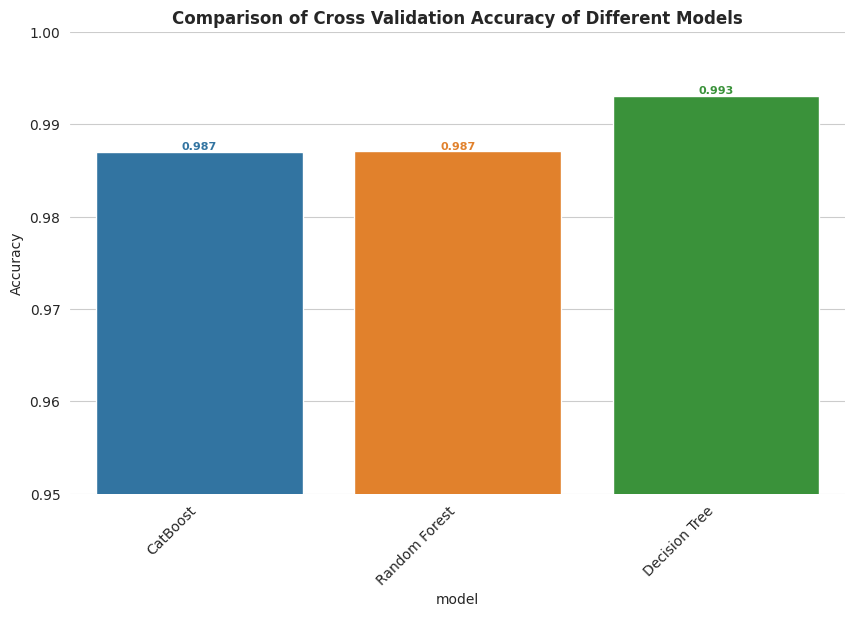

In [21]:
# Create the bar plot


sns.set_style("whitegrid")


fig, ax = plt.subplots(figsize=(10, 6))


sns.barplot(x="model", y="Accuracy", data=models, ax=ax)


sns.despine(left=True, bottom=True)


ax.set_ylabel("Accuracy")


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Set the y-axis limits to zoom in on the upper part of the plot

ax.set_ylim(0.95, 1)


# Add the title in bold font


plt.title("Comparison of Cross Validation Accuracy of Different Models", fontweight='bold')


# Add the scores to each bar with the same color as the bar


for p in ax.patches:


    color = p.get_facecolor()


    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=8, color=color, fontweight='bold')


plt.show()